In [1]:
import numpy as np
import matplotlib.pyplot as plt
#for generating random numbers
from numpy.random import seed, randint
from functions import generate_single_exp, stretch_exp_fit, double_exp_fit, single_exp_fit

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

### Generate random array of lifetime values

In [3]:
seed(10)
tau_vals = randint(1,1000,100)*1e-9 # convert to s

Text(0.5, 0, 'Tau values (ns)')

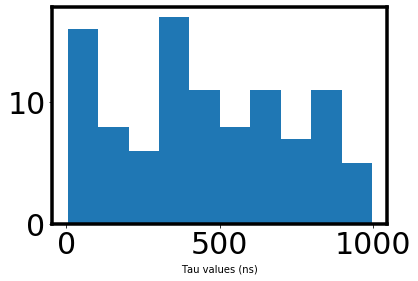

In [4]:
plt.figure()
plt.hist(tau_vals*1e9)
plt.xlabel("Tau values (ns)")

### Generate time array

In [49]:
t = np.linspace(0,10000,num=1000)*1e-9 # converted to s

### Generate single exponentials and average them to see the stretched behavior

In [6]:
I_vals = []

for i in range(len(tau_vals)):
    I_vals.append(generate_single_exp(t,tau_vals[i]))
    
I_vals = np.asarray(I_vals)
#Average Trace
I_avg = np.average(I_vals,axis=0)

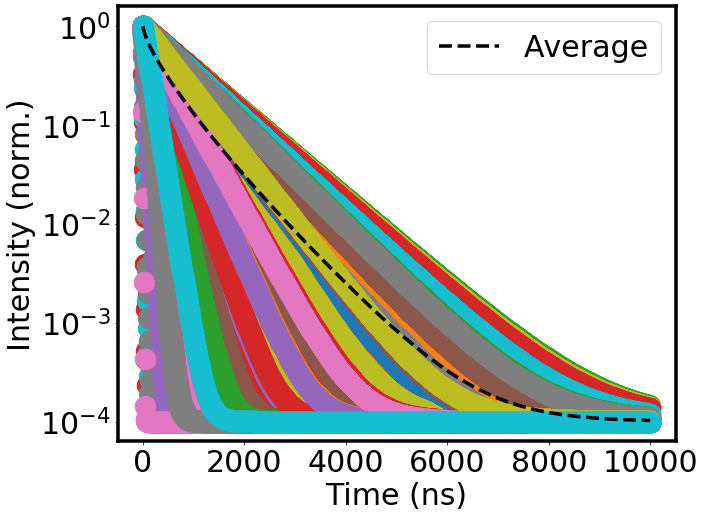

In [7]:
plt.figure(figsize=(10,8))
for i in range(len(tau_vals)):
    plt.plot(t*1e9,I_vals[i],'o')
plt.plot(t*1e9,I_avg,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Fit average decay with stretched exponential, double exponential and single exponential 

Margherita ---- can you write a function for fitting it with single exponential and fit it? You can refer to my fit functions in the directory labeled "functions.py"

In [8]:
stretched_exp = stretch_exp_fit(I_avg/np.max(I_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 410.11820144240187
Beta = 0.7828463475732753
avg. tau (ns) = 472.10769635808225


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)) + noise)
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)) + noise)


In [9]:
double_exp = double_exp_fit(I_avg/np.max(I_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 245.35327557551884
a1 = 0.4519808425270824
tau2 (ns) = 746.3309890127839
a2 = 0.463271484576714
avg. tau (ns) = 498.9321872821358


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [10]:
single_exp = single_exp_fit(I_avg/np.max(I_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(double_exp[2]*1e9))

tau (ns) = 610.8223639515147
a = 0.745687202620224
avg. tau (ns) = 746.3309890127839


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ) + noise)
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ) + noise)
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:131: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:131: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


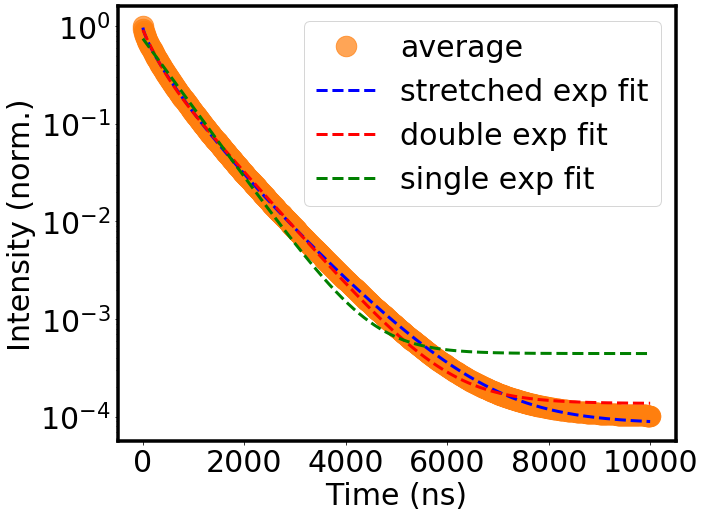

In [11]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, I_avg/np.max(I_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Create a random np array of 20 lifetimes with values far apart from one another

In [57]:
tau_far = np.array([2, 955, 422, 49, 544, 245, 111, 643, 765, 976, 1002, 408, 87, 872, 175, 303, 645, 226, 677, 788])

Text(0.5, 0, 'Tau values (ns)')

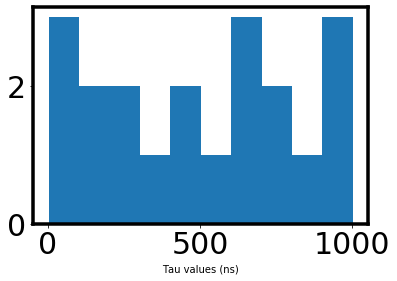

In [58]:
plt.figure()
plt.hist(tau_far)
plt.xlabel("Tau values (ns)")

### Take the average of all the single exponetial of each of the 20 lifetimes

In [60]:
t_far = np.linspace(0,10000,num=1000)

In [65]:
I_values = []

for i in range(len(tau_far)):
    I_values.append(generate_single_exp(t_far,tau_far[i]))
    
I_values = np.asarray(I_values)
I_average = np.average(I_values,axis=0)

In [66]:
I_average

array([1.00010000e+00, 9.13926175e-01, 8.80281480e-01, 8.49732965e-01,
       8.21589148e-01, 7.95541969e-01, 7.71332941e-01, 7.48742987e-01,
       7.27585833e-01, 7.07702575e-01, 6.88957188e-01, 6.71232817e-01,
       6.54428703e-01, 6.38457638e-01, 6.23243849e-01, 6.08721240e-01,
       5.94831929e-01, 5.81525023e-01, 5.68755597e-01, 5.56483839e-01,
       5.44674329e-01, 5.33295433e-01, 5.22318796e-01, 5.11718905e-01,
       5.01472726e-01, 4.91559390e-01, 4.81959929e-01, 4.72657049e-01,
       4.63634931e-01, 4.54879068e-01, 4.46376115e-01, 4.38113768e-01,
       4.30080651e-01, 4.22266225e-01, 4.14660699e-01, 4.07254964e-01,
       4.00040522e-01, 3.93009435e-01, 3.86154272e-01, 3.79468063e-01,
       3.72944263e-01, 3.66576714e-01, 3.60359617e-01, 3.54287496e-01,
       3.48355182e-01, 3.42557783e-01, 3.36890664e-01, 3.31349433e-01,
       3.25929917e-01, 3.20628154e-01, 3.15440370e-01, 3.10362974e-01,
       3.05392542e-01, 3.00525807e-01, 2.95759649e-01, 2.91091086e-01,
      

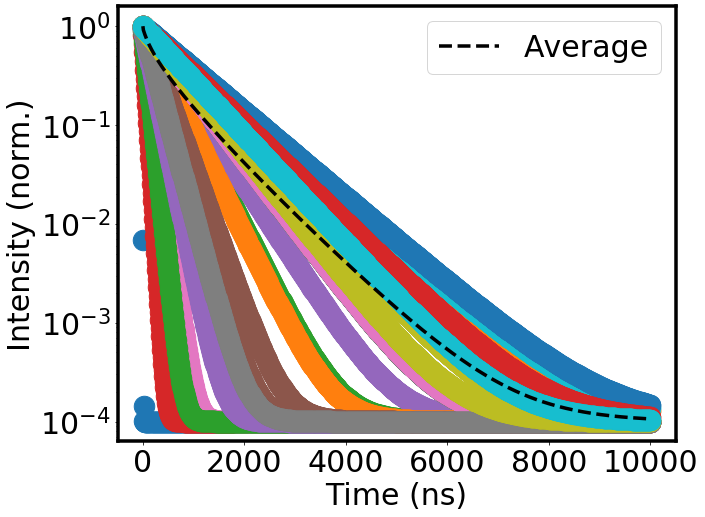

In [67]:
plt.figure(figsize=(10,8))
for i in range(len(tau_far)):
    plt.plot(t_far,I_values[i],'o')
plt.plot(t_far,I_average,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [85]:
far_stretched_exp = stretch_exp_fit(I_average/np.max(I_average), t_far)
print("tau_c (ns) = "+str(far_stretched_exp[0]*1e9))
print("Beta = "+str(far_stretched_exp[1]))
print("avg. tau (ns) = "+str(far_stretched_exp[3]*1e9))

tau_c (ns) = 8725.370413276645
Beta = 0.05116638165407994
avg. tau (ns) = 5.383386501129535e+21


In [86]:
far_double_exp = double_exp_fit(I_average/np.max(I_average), t_far)
print("tau1 (ns) = "+str(far_double_exp[0]*1e9))
print("a1 = "+str(far_double_exp[1]))
print("tau2 (ns) = "+str(far_double_exp[2]*1e9))
print("a2 = "+str(far_double_exp[3]))
print("avg. tau (ns) = "+str(far_double_exp[4]*1e9))

tau1 (ns) = 242.83895715894394
a1 = 0.7974446198494608
tau2 (ns) = 4353.587782115922
a2 = 0.06843865252036785
avg. tau (ns) = 567.748929908227


In [87]:
far_single_exp = single_exp_fit(I_average/np.max(I_average), t_far)
print("tau (ns) = "+str(far_single_exp[0]*1e9))
print("a = "+str(far_single_exp[1]))
print("avg. tau (ns) = "+str(far_single_exp[2]*1e9))

tau (ns) = 531.0839710464599
a = 0.8487337768376124
avg. tau (ns) = 531.0839710464599


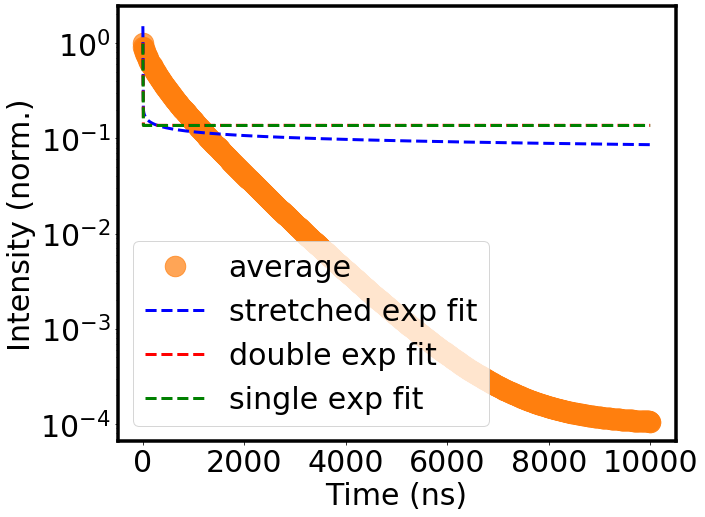

In [88]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t_far, I_average/np.max(I_average),'C1o', alpha=0.7,label="average")
plt.plot(t_far, far_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_far, far_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_far, far_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()